# Data Preprocessing


## Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, auc, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import keras
from keras import models
from keras import layers
from keras import optimizers
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project AI/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [ ]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
y

,Diabetes_binary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
70687,1.0
70688,1.0
70689,1.0
70690,1.0


##Data Exploration

0 is for no diabetes or only during pregnancy, 1 is for prediabetes/diabetes

In [ ]:
value_counts = y.value_counts()*100/len(y)
value_counts

,count
Diabetes_binary,
0.0,50.0
1.0,50.0


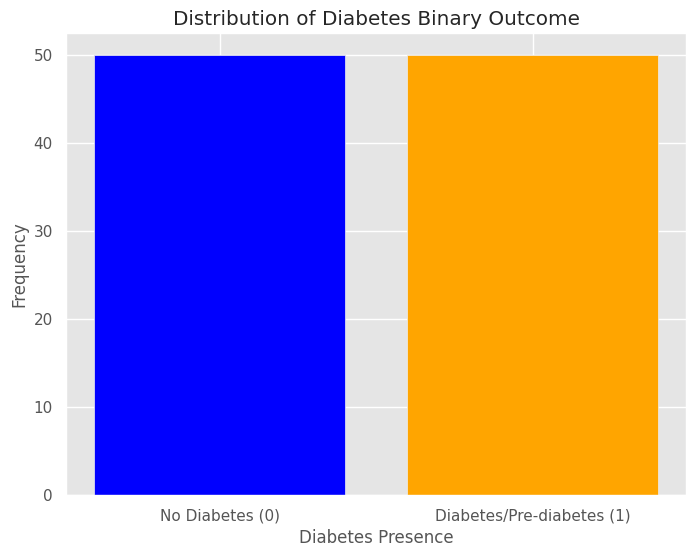

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index.astype(str), value_counts.values, color=['blue', 'orange'])
plt.title('Distribution of Diabetes Binary Outcome')
plt.xlabel('Diabetes Presence')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No Diabetes (0)', 'Diabetes/Pre-diabetes (1)'])
plt.show()

In [ ]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

We try to identify whether each feature in the dataset has any outliers based on the Interquartile Range (IQR) method:

In [ ]:
for feature in X:
    Q1 = X[feature].quantile(0.25)
    Q3 = X[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if X[(X[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

HighBP no
HighChol no
CholCheck no
BMI yes
Smoker no
Stroke yes
HeartDiseaseorAttack yes
PhysActivity no
Fruits no
Veggies no
HvyAlcoholConsump yes
AnyHealthcare no
NoDocbcCost yes
GenHlth no
MentHlth yes
PhysHlth yes
DiffWalk no
Sex no
Age no
Education no
Income no


<Axes: xlabel='PhysHlth', ylabel='Density'>

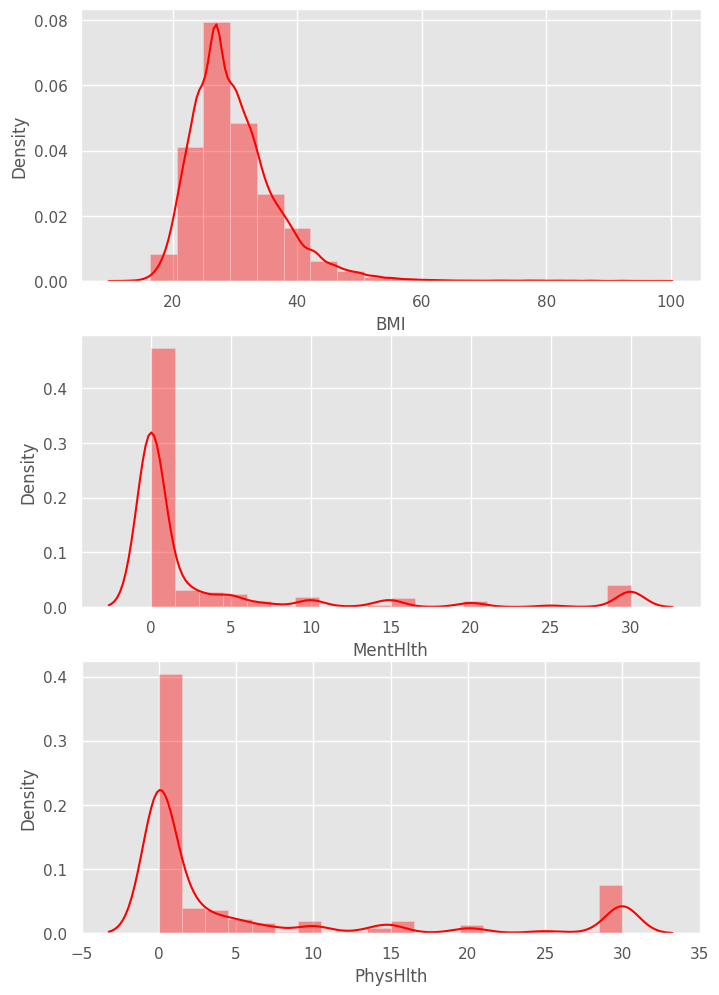

In [ ]:
fig,ax = plt.subplots(3,1, figsize=(8,12))
sns.distplot(X.BMI, bins=20, ax=ax[0], color="red")
sns.distplot(X.MentHlth, bins=20, ax=ax[1], color="red")
sns.distplot(X.PhysHlth, bins=20, ax=ax[2], color="red")

In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()

# Summarizing the distribution of the data
data_description = data.describe(include='all')

missing_values, data_description


(Diabetes_binary         0
 HighBP                  0
 HighChol                0
 CholCheck               0
 BMI                     0
 Smoker                  0
 Stroke                  0
 HeartDiseaseorAttack    0
 PhysActivity            0
 Fruits                  0
 Veggies                 0
 HvyAlcoholConsump       0
 AnyHealthcare           0
 NoDocbcCost             0
 GenHlth                 0
 MentHlth                0
 PhysHlth                0
 DiffWalk                0
 Sex                     0
 Age                     0
 Education               0
 Income                  0
 dtype: int64,
        Diabetes_binary        HighBP      HighChol     CholCheck  \
 count     70692.000000  70692.000000  70692.000000  70692.000000   
 mean          0.500000      0.563458      0.525703      0.975259   
 std           0.500004      0.495960      0.499342      0.155336   
 min           0.000000      0.000000      0.000000      0.000000   
 25%           0.000000      0.000000      0.0

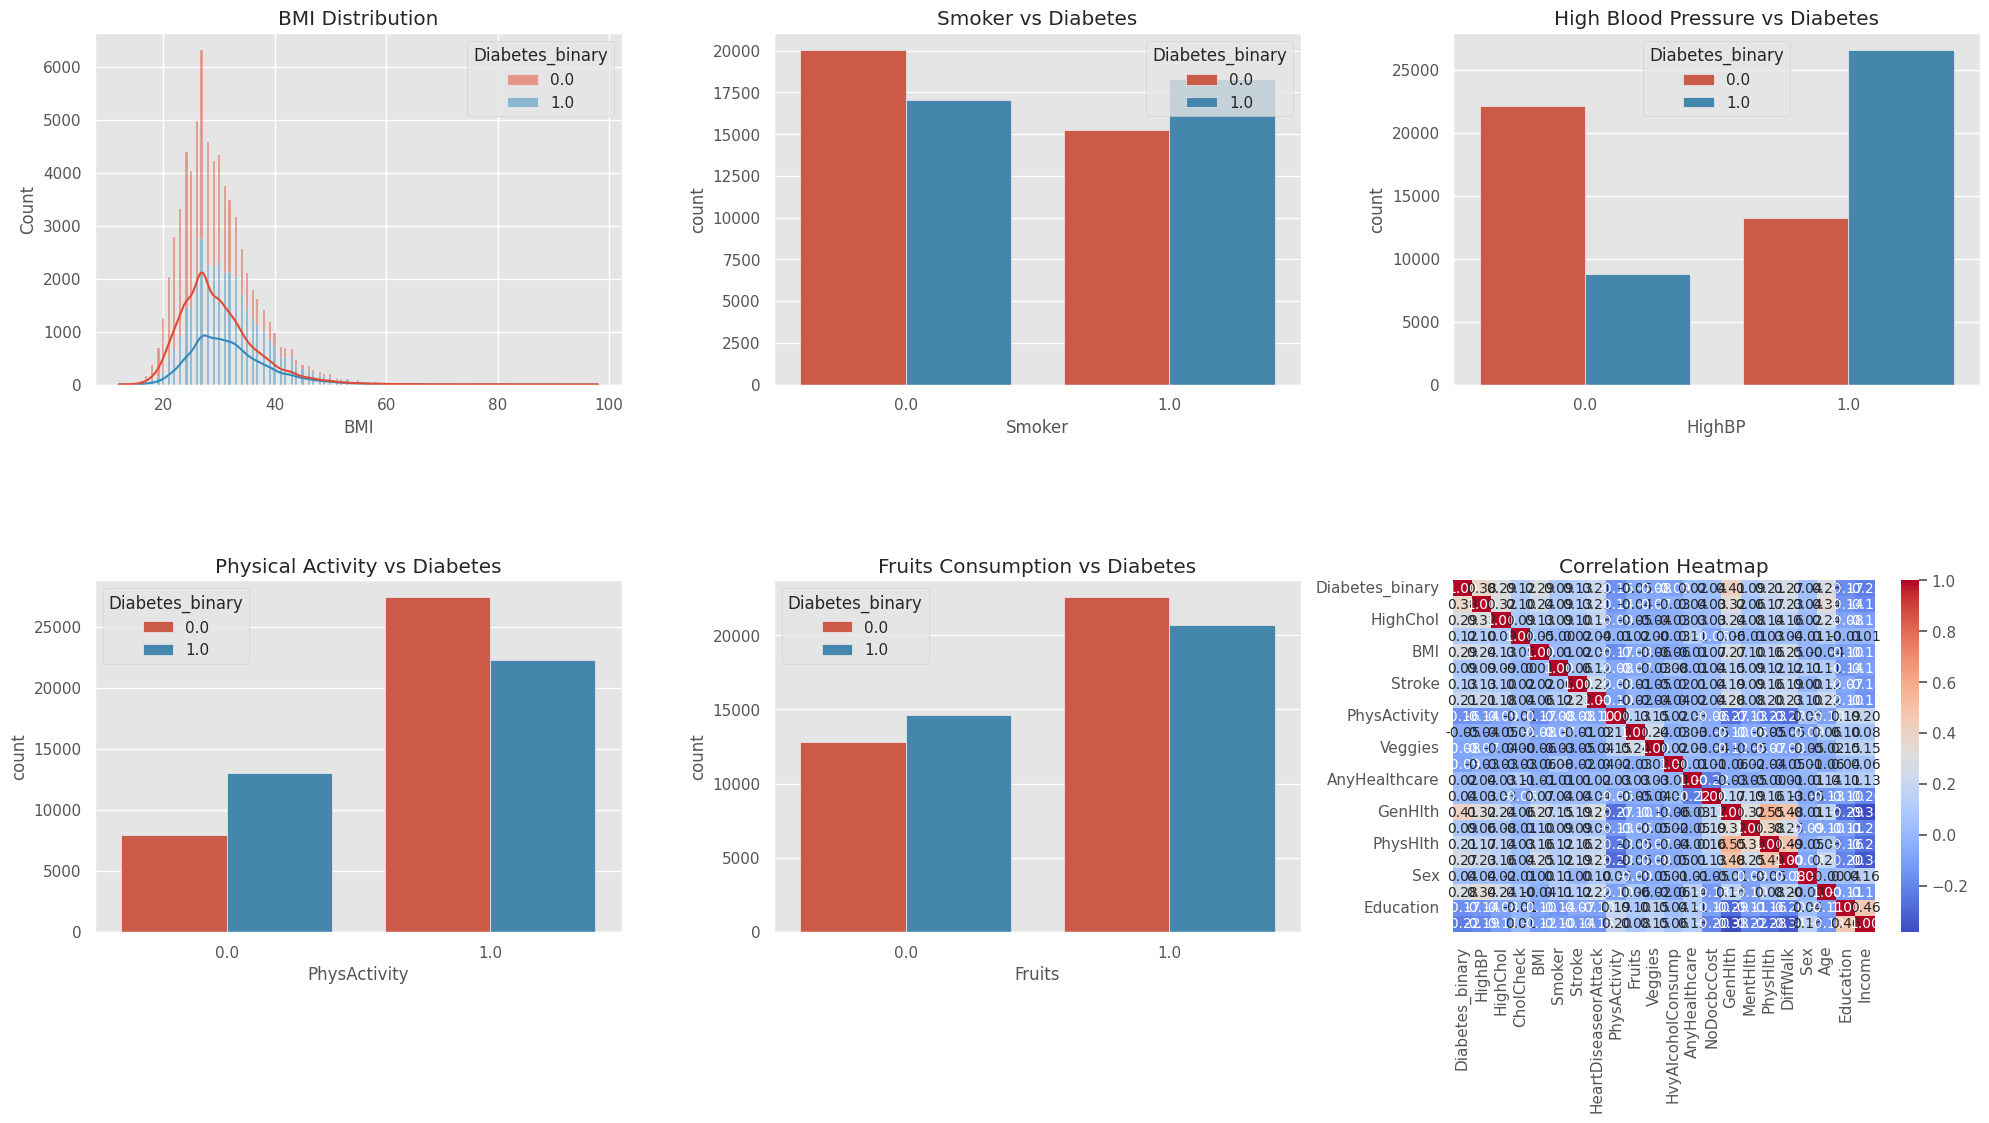

In [ ]:

# Setting up the visualizations
plt.figure(figsize=(20, 15))

# Histogram for BMI
plt.subplot(3, 3, 1)
sns.histplot(data=data, x='BMI', kde=True, hue='Diabetes_binary', multiple='stack')
plt.title('BMI Distribution')

# Bar plot for Smoker
plt.subplot(3, 3, 2)
sns.countplot(data=data, x='Smoker', hue='Diabetes_binary')
plt.title('Smoker vs Diabetes')

# Bar plot for HighBP
plt.subplot(3, 3, 3)
sns.countplot(data=data, x='HighBP', hue='Diabetes_binary')
plt.title('High Blood Pressure vs Diabetes')

# Bar plot for PhysActivity
plt.subplot(3, 3, 4)
sns.countplot(data=data, x='PhysActivity', hue='Diabetes_binary')
plt.title('Physical Activity vs Diabetes')

# Bar plot for Fruits
plt.subplot(3, 3, 5)
sns.countplot(data=data, x='Fruits', hue='Diabetes_binary')
plt.title('Fruits Consumption vs Diabetes')

# Correlation heatmap
plt.subplot(3, 3, 6)
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()


## Splitting the dataset into the Training set and Test set

In [ ]:
X = X.drop(columns = ["AnyHealthcare","NoDocbcCost", "Income", "Education"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
7295,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,9.0
44106,1.0,1.0,1.0,36.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,10.0,0.0,1.0,1.0,7.0
50743,1.0,1.0,1.0,27.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0,25.0,30.0,1.0,1.0,9.0
29129,0.0,1.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0
63691,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,2.0,0.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49100,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,30.0,0.0,1.0,11.0
20609,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,10.0,0.0,0.0,10.0
21440,0.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,5.0,0.0,0.0,0.0,4.0
50057,1.0,1.0,1.0,39.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,10.0


In [ ]:
y_train

,Diabetes_binary
7295,0.0
44106,1.0
50743,1.0
29129,0.0
63691,1.0
...,...
49100,1.0
20609,0.0
21440,0.0
50057,1.0


## Feature Scaling

In [ ]:
non_binary_features = [col for col in X_train.columns if X_train[col].nunique() > 2]

print(non_binary_features)



['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']


No Fitting on Test Data: Always fit the scaler on the training data only. This ensures the model is only exposed to information from the training set.

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,9.0
1,1.0,1.0,1.0,36.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,10.0,0.0,1.0,1.0,7.0
2,1.0,1.0,1.0,27.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0,25.0,30.0,1.0,1.0,9.0
3,0.0,1.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0
4,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,2.0,0.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49479,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,30.0,0.0,1.0,11.0
49480,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,10.0,0.0,0.0,10.0
49481,0.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,5.0,0.0,0.0,0.0,4.0
49482,1.0,1.0,1.0,39.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,10.0


In [ ]:
y_test

,Diabetes_binary
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
21203,1.0
21204,0.0
21205,0.0
21206,0.0


#Function to evaluate metrics

In [ ]:
all_metrics ={}
def evaluate_metrics(model_name, yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f1_score, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f1_score
    all_metrics[model_name] = results_pos
    return results_pos

#Usupervised Learning: K-means Clustering

##The elbow method

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state= 42)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

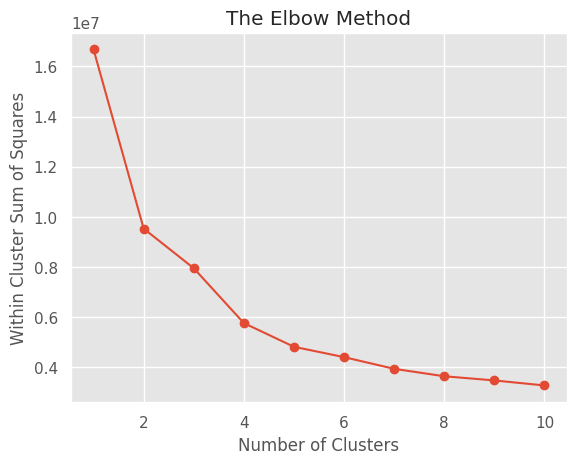

In [ ]:
plt.plot(range(1,11), wcss, 'o-')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.show()

##Training the K-means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 2, init='k-means++', random_state= 42)
kmeans_3 = KMeans(n_clusters = 3, init='k-means++', random_state= 42)

y_kmeans = kmeans.fit_predict(data)
y_kmeans3 = kmeans_3.fit_predict(data)

In [ ]:
print(y_kmeans)

[1 0 0 ... 0 0 0]


In [ ]:
sil_score = silhouette_score(X, kmeans.labels_)
sil_score_3 = silhouette_score(X, kmeans_3.labels_)
print(f"Silhouette Score for 2 clusters: {sil_score}")
print(f"Silhouette Score for 3 clusters: {sil_score_3}")

Silhouette Score for 2 clusters: 0.5704569950840828
Silhouette Score for 3 clusters: 0.390891543623933


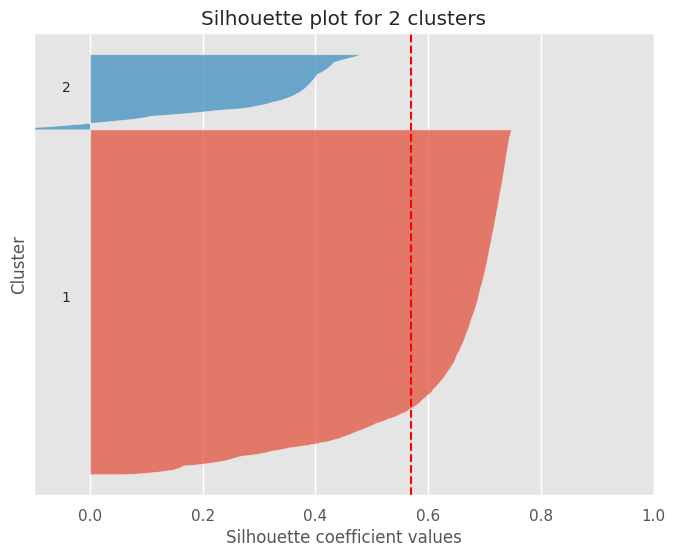

In [ ]:
silhouette_vals = silhouette_samples(X, y_kmeans)

fig, ax = plt.subplots(figsize=(8, 6))

y_lower = 10
n_clusters = 2
for i in range(n_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[y_kmeans == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_vals,
                     alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))

    y_lower = y_upper + 10

ax.axvline(x=sil_score, color="red", linestyle="--")

ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster")

ax.set_title(f"Silhouette plot for {n_clusters} clusters")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])

plt.show()

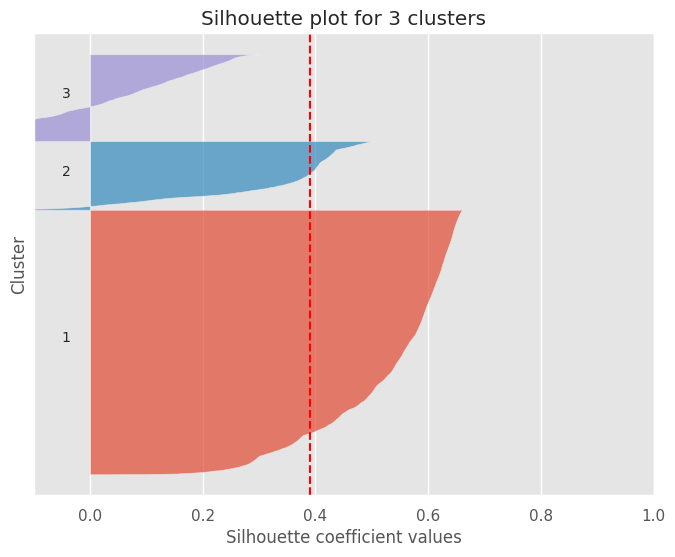

In [ ]:
silhouette_vals = silhouette_samples(X, y_kmeans3)

fig, ax = plt.subplots(figsize=(8, 6))

y_lower = 10
n_clusters = 3
for i in range(n_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[y_kmeans3 == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_vals,
                     alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))

    y_lower = y_upper + 10

ax.axvline(x=sil_score_3, color="red", linestyle="--")

ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster")

ax.set_title(f"Silhouette plot for {n_clusters} clusters")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])

plt.show()

# Classification: Logistic Regression

In [ ]:
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
print(classifier_lr.predict(X_test.iloc[4].values.reshape(1,-1)))

[1.]


In [ ]:
y_pred = classifier_lr.predict(X_test)

# Setting print options
np.set_printoptions(precision=2)

# Ensure y_test and y_pred are NumPy arrays
y_test_array = y_test.values if isinstance(y_test, pd.DataFrame) else y_test
y_pred_array = y_pred

# Use np.column_stack to stack y_pred and y_test as columns
result = np.column_stack((y_pred_array, y_test_array))

# Print the result
print(result)

[[0. 0.]
 [1. 1.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [1. 1.]]


In [ ]:
cm_lr = confusion_matrix(y_test, y_pred)
print(cm_lr)

[[7636 3045]
 [2405 8122]]


**We had 74% of correct predictions**

In [ ]:
evaluate_metrics("Logistic regression", y_test, y_pred)

{'accuracy': 0.7430215013202565,
 'recall': 0.7715398499097559,
 'precision': 0.7273215724903734,
 'f1score': 0.7487784640914539}

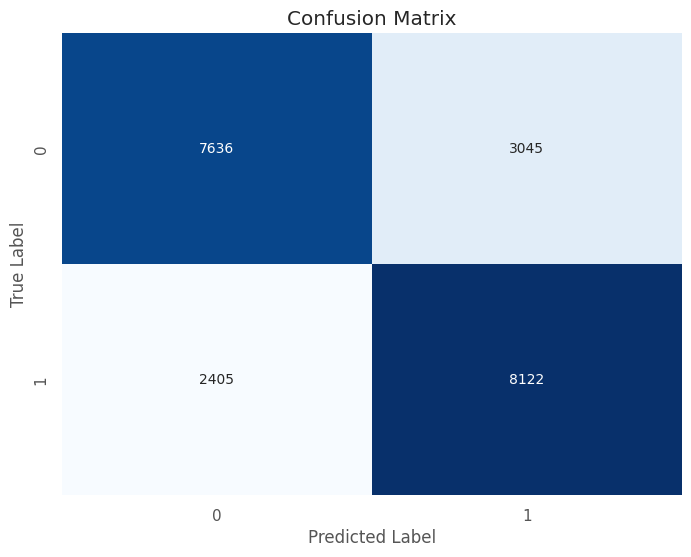

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

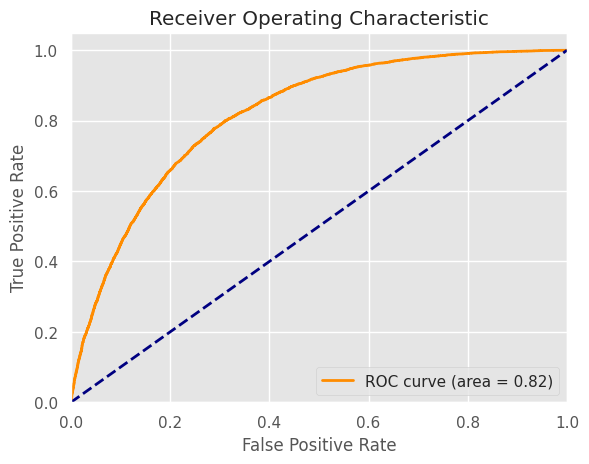

In [ ]:
y_pred_proba = classifier_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

###Feature Importance

                 Feature  Importance
0                 HighBP    0.810083
1               HighChol    0.731170
11               GenHlth    0.492629
5                 Stroke    0.144432
16                   Age    0.121945
6   HeartDiseaseorAttack    0.116427
15                   Sex    0.089823
14              DiffWalk    0.073192
3                    BMI    0.058583
13              PhysHlth   -0.000598
12              MentHlth   -0.004236
4                 Smoker   -0.007435
9                Veggies   -0.050169
8                 Fruits   -0.117738
7           PhysActivity   -0.136587
2              CholCheck   -0.802104
10     HvyAlcoholConsump   -1.034837


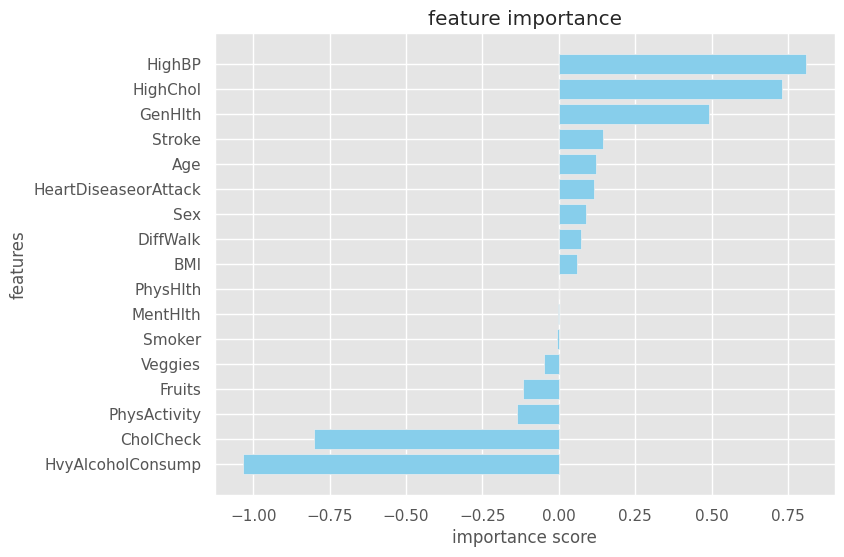

In [ ]:
feature_importance = classifier_lr.coef_[0]


feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('importance score')
plt.ylabel('features')
plt.title('feature importance')
plt.gca().invert_yaxis()
plt.show()

# Classification : K-NN

In [ ]:
classifier_knn = KNeighborsClassifier(n_neighbors = 20, metric = 'manhattan', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=20)

In [ ]:
print(classifier_knn.predict(X_test.iloc[4].values.reshape(1,-1)))

[0.]


In [ ]:
y_pred = classifier_knn.predict(X_test)
np.set_printoptions(precision=2)
y_test_array = y_test.values if isinstance(y_test, pd.DataFrame) else y_test
y_pred_array = y_pred
result = np.column_stack((y_pred_array, y_test_array))
print(result)

[[0. 0.]
 [1. 1.]
 [0. 0.]
 ...
 [0. 0.]
 [1. 0.]
 [1. 1.]]


In [ ]:
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)
print("K-NN accuracy score:", accuracy_score(y_test, y_pred))

[[7622 3059]
 [2625 7902]]
K-NN accuracy score: 0.7319879290833647


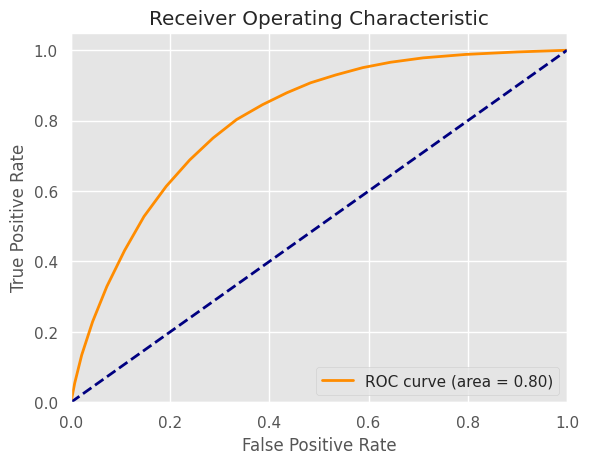

In [ ]:
y_pred_proba = classifier_knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
evaluate_metrics("K-NN", y_test, y_pred)

{'accuracy': 0.7319879290833647,
 'recall': 0.7506412083214591,
 'precision': 0.7209196241218867,
 'f1score': 0.7354802680565897}

#Classification: Decision Tree

In [ ]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
print(classifier_dt.predict(X_test.iloc[4].values.reshape(1,-1)))

[0.]


In [ ]:
y_pred = classifier_dt.predict(X_test)

np.set_printoptions(precision=2)

y_test_array = y_test.values if isinstance(y_test, pd.DataFrame) else y_test
y_pred_array = y_pred

result = np.column_stack((y_pred_array, y_test_array))

print(result)

[[0. 0.]
 [1. 1.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [1. 1.]]


In [ ]:
cm_dt = confusion_matrix(y_test, y_pred)
print(cm_dt)
print("Decision Tree accuracy score:", accuracy_score(y_test, y_pred))

[[7261 3420]
 [3734 6793]]
Decision Tree accuracy score: 0.6626744624669936


In [ ]:
evaluate_metrics("Decision Tree",y_test, y_pred)

{'accuracy': 0.6626744624669936,
 'recall': 0.6452930559513632,
 'precision': 0.6651326740428866,
 'f1score': 0.6550626808100289}

#Classification: Random Forest

In [ ]:
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier_rf.predict(X_test)

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)
print(cm_rf)
print("Random Forest Classifier accuracy score:", accuracy_score(y_test, y_pred))

[[7412 3269]
 [2574 7953]]
Random Forest Classifier accuracy score: 0.7244907582044512


In [ ]:
evaluate_metrics("Random Forest",y_test, y_pred)

{'accuracy': 0.7244907582044512,
 'recall': 0.7554858934169278,
 'precision': 0.7086972019247906,
 'f1score': 0.7313439698376937}

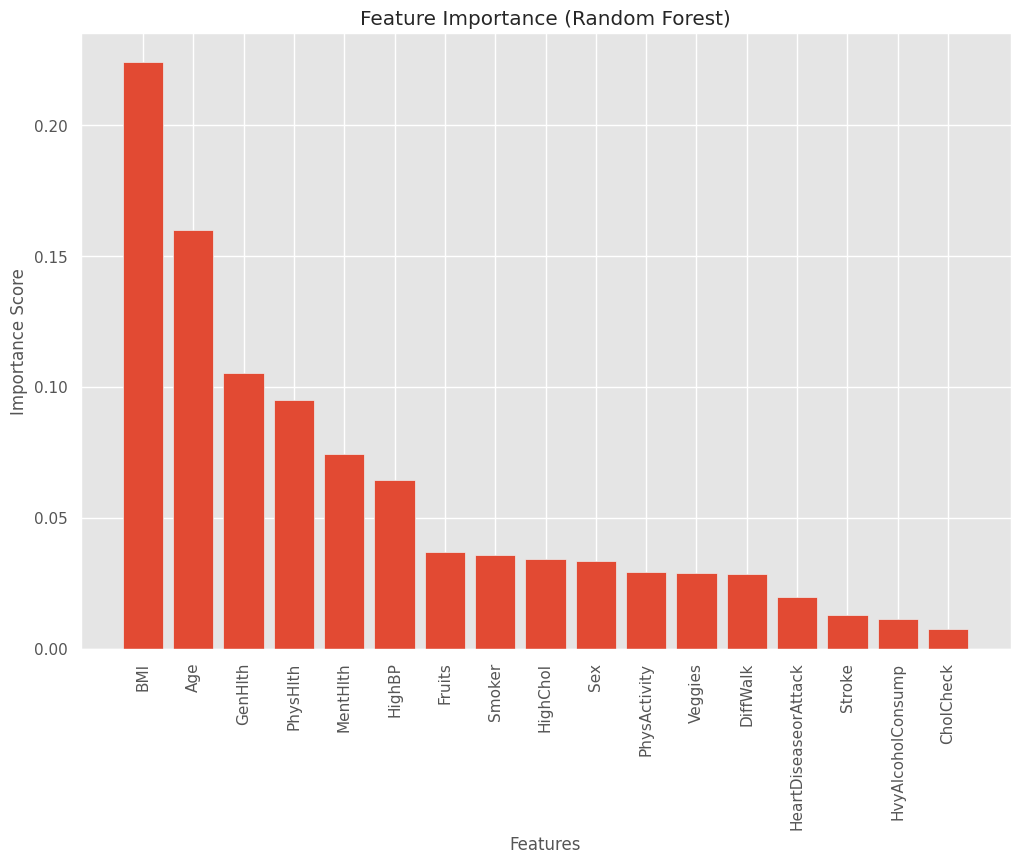

In [ ]:
importances = classifier_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(12, 8))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

#Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = gbc.predict(X_test)

In [ ]:
evaluate_metrics("Gradient Boosting Classifier",y_test, y_pred)

{'accuracy': 0.7554696341003395,
 'recall': 0.7959532630379025,
 'precision': 0.7339055793991416,
 'f1score': 0.7636711629602625}

#Neural Network

We build the neural network using Keras, a deep learning library in Python. Our network will have two layers and an output layer:
- First Hidden Layer: A dense (fully connected) layer with 6 units (neurons) and a ReLU activation function is added. This layer also acts as the input layer since it is the first layer of the model.
- Second Hidden Layer: Another dense layer with 6 units and a ReLU activation function is added. This provides another layer of abstraction for learning.
- Output Layer: A dense layer with 1 unit and a sigmoid activation function is added. The sigmoid function is used here because this is a binary classification problem, and the output will be a probability (a value between 0 and 1).

##Build the network

In [ ]:
from keras.optimizers import Adam

#initializing the neural network
ann = models.Sequential()
#Input layer and the first hidden layer
ann.add(layers.Dense(units=6, activation='relu'))
#Second hidden layer
ann.add(layers.Dense(units=6, activation='relu'))
#Output layer
ann.add(layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy','recall', 'precision', 'f1_score'])

##Train the network

- Optimizer: The Adam optimizer is chosen, which is an efficient and widely used optimization algorithm in deep learning.
- Loss Function: The binary cross-entropy loss function is specified because this is a binary classification problem.
- Metrics: Accuracy is specified as the metric to monitor during training.

- Input Data: The model is trained using the training data (X_train for features and y_train for labels).
- Batch Size: The batch size is set to 32, meaning that the model will process 32 samples at a time before updating the weights.
- Epochs: The model is trained for 20 epochs, meaning that the entire training dataset is passed through the model 20 times.

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 25)

Epoch 1/25
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5747 - f1_score: 0.6684 - loss: 1.1413 - precision: 0.5529 - recall: 0.5303
Epoch 2/25
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7179 - f1_score: 0.6614 - loss: 0.5532 - precision: 0.6847 - recall: 0.7934
Epoch 3/25
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7273 - f1_score: 0.6681 - loss: 0.5371 - precision: 0.6949 - recall: 0.8134
Epoch 4/25
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7335 - f1_score: 0.6673 - loss: 0.5301 - precision: 0.7025 - recall: 0.8114
Epoch 5/25
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7368 - f1_score: 0.6687 - loss: 0.5258 - precision: 0.7079 - recall: 0.8106
Epoch 6/25
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7396 - f1_score: 0.6676 - loss: 0.5212 - precision: 0.7121 - recall: 0.8064
Epoch 7/25
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7426 - f1_score: 0.6687 - loss: 0.5185 - precision: 0.7170 - recall:

In [ ]:
test_loss, test_accuracy, test_recall, test_f1score, test_precision = ann.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1score}")
print(f"Test Precision: {test_precision}")


663/663 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7474 - f1_score: 0.6597 - loss: 0.5110 - precision: 0.7017 - recall: 0.8467
Test Loss: 0.5116636157035828
Test Accuracy: 0.7475952506065369
Test Recall: 0.847059965133667
Test F1 Score: 0.7043443918228149
Test Precision: 0.6634314656257629


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Project AI/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
X = test_data.iloc[:, 1:]
y = test_data.iloc[:, 0]
X = X.drop(columns = ["AnyHealthcare","NoDocbcCost", "Income", "Education"])
X_scaled = scaler.fit_transform(X)

In [ ]:
test_loss, test_accuracy, test_recall, test_f1score, test_precision = ann.evaluate(X, y)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1score}")
print(f"Test Precision: {test_precision}")

2210/2210 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6769 - f1_score: 0.2259 - loss: 0.5756 - precision: 0.2450 - recall: 0.4225
Test Loss: 0.5126304030418396
Test Accuracy: 0.7470434904098511
Test Recall: 0.8473094701766968
Test F1 Score: 0.7057783603668213
Test Precision: 0.6666666269302368


#Metrics Comparison

- Gradient Boosting Classifier seems to be the best-performing model overall,
with the highest accuracy, precision, and F1-Score, making it robust and balanced.
- ANN performs very well in terms of recall, meaning it is excellent at identifying true positive cases (diabetic/prediabetic) but struggles with precision (more false positives).
- Logistic Regression and Random Forest also perform decently, but both are outperformed by Gradient Boosting and ANN in most metrics.

In [ ]:
ann_metrics = {
    'accuracy': test_accuracy,
    'recall': test_recall,
    'precision': test_precision,
    'f1score': test_f1score
}

all_metrics['ANN'] = ann_metrics
metrics_df = pd.DataFrame.from_dict(all_metrics, orient='index')
metrics_df

,accuracy,recall,precision,f1score
Logistic regression,0.743022,0.771540,0.727322,0.748778
K-NN,0.731988,0.750641,0.720920,0.735480
Decision Tree,0.662674,0.645293,0.665133,0.655063
Random Forest,0.724491,0.755486,0.708697,0.731344
Gradient Boosting Classifier,0.755470,0.795953,0.733906,0.763671
ANN,0.747043,0.847309,0.666667,0.705778
